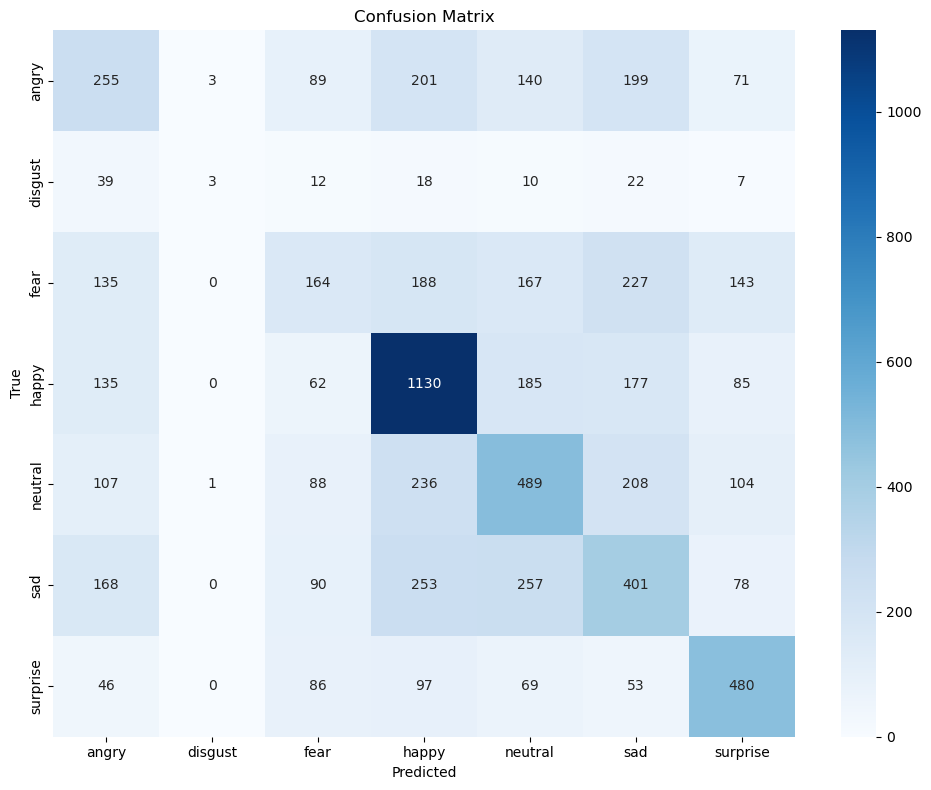

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

mlp_cmatrix = [[255, 3, 89, 201, 140, 199, 71], [39, 3, 12, 18, 10, 22, 7], [135, 0, 164, 188, 167, 227, 143], [135, 0, 62, 1130, 185, 177, 85], [107, 1, 88, 236, 489, 208, 104], [168, 0, 90, 253, 257, 401, 78], [46, 0, 86, 97, 69, 53, 480]]

rnn_cmatrix = [[81, 0, 78, 294, 192, 225, 88], [6, 1, 9, 32, 31, 25, 7], [66, 1, 146, 256, 202, 221, 132], [43, 0, 80, 1204, 160, 217, 70], [41, 1, 65, 297, 515, 261, 53], [55, 0, 89, 302, 293, 447, 61], [29, 1, 72, 124, 64, 78, 463]]

plt.figure(figsize=(10, 8))
sns.heatmap(mlp_cmatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('mlp_confusion_matrix.png')
plt.show()

    

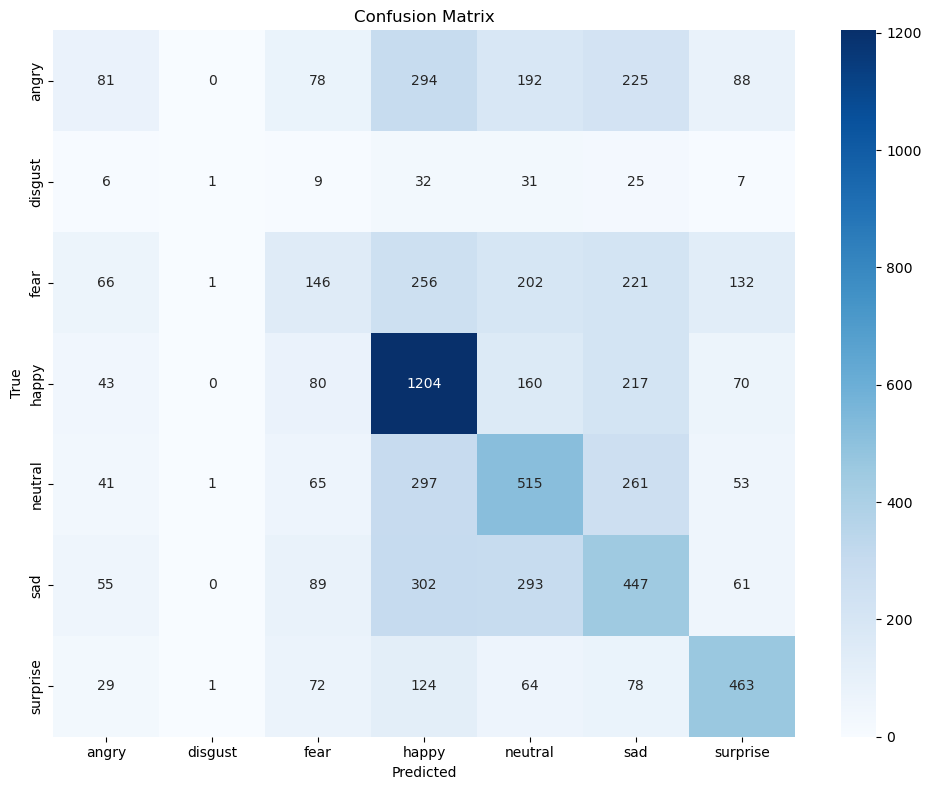

In [49]:
plt.figure(figsize=(10, 8))
sns.heatmap(rnn_cmatrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=classes, 
            yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('rnn_confusion_matrix.png')
plt.show()

In [50]:
def precision(cmatrix, labels):
    stats = {}
    for lab in range(len(labels)):
        c_tp = cmatrix[lab][lab]
        fp = 0
        for cf in range(len(labels)):
            if cf == lab:
                continue
            fp += cmatrix[cf][lab]
        stats[labels[lab]] = (c_tp) / (c_tp + fp)
    return stats


In [51]:
rnn_precision = precision(rnn_cmatrix, classes)

In [52]:
mlp_precision = precision(mlp_cmatrix, classes)

In [53]:
def recall(cmatrix, labels):
    stats = {}
    for lab in range(len(labels)):
        c_tp = cmatrix[lab][lab]
        fn = 0
        for cf in range(len(labels)):
            if cf == lab:
                continue
            fn += cmatrix[lab][cf]
        stats[labels[lab]] = (c_tp) / (c_tp + fn)
    return stats

In [54]:
rnn_recall = recall(rnn_cmatrix, classes)

In [55]:
mlp_recall = recall(mlp_cmatrix, classes)

In [56]:
def f1_score(cmatrix, labels):
    f1_stats = {}
    p_stats = precision(cmatrix, labels)
    r_stats = recall(cmatrix, labels)

    for label in labels:
        f1_stats[label] = (p_stats[label] * r_stats[label]) / (p_stats[label] + r_stats[label]) 
    return f1_stats


In [57]:
rnn_f1 = f1_score(rnn_cmatrix, classes)

In [58]:
mlp_f1 = f1_score(mlp_cmatrix, classes)

In [59]:
def accuracy(cmatrix, labels):
    correct_predictions = 0
    for c in range(len(labels)):
        correct_predictions += cmatrix[c][c]
    incorrect_predictions = 0
    for i in range(len(labels)):
        for j in range(len(labels)):
            if i == j:
                continue
            incorrect_predictions += cmatrix[i][j]
    return correct_predictions / (correct_predictions + incorrect_predictions)   

In [60]:
rnn_acc = accuracy(rnn_cmatrix, classes)

In [61]:
mlp_acc = accuracy(mlp_cmatrix, classes)

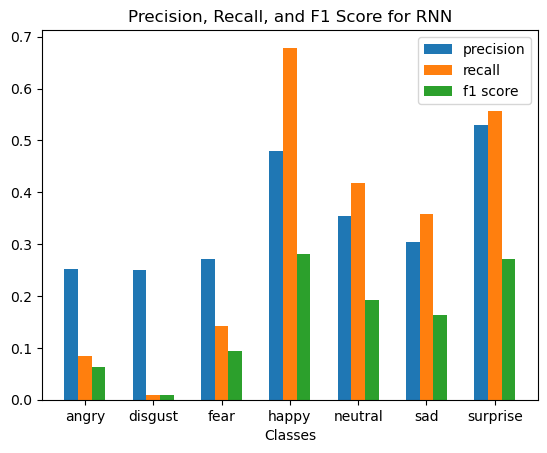

In [64]:
import numpy as np
width = 0.2
x = np.arange(len(classes))
plt.bar(x - width, rnn_precision.values(), width, label='precision')
plt.bar(x, rnn_recall.values(), width, label='recall')
plt.bar(x + width, rnn_f1.values(), width, label='f1 score')
plt.xlabel("Classes")
plt.xticks(x, classes)
plt.legend()
plt.title('Precision, Recall, and F1 Score for RNN')
plt.savefig('rnn_metrics.png')
plt.show()

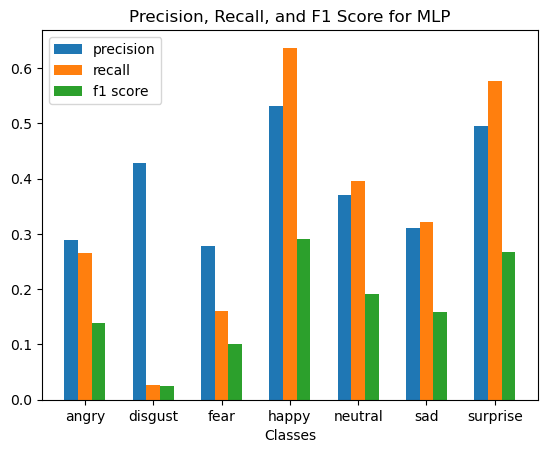

In [65]:
import numpy as np
width = 0.2
x = np.arange(len(classes))
plt.bar(x - width, mlp_precision.values(), width, label='precision')
plt.bar(x, mlp_recall.values(), width, label='recall')
plt.bar(x + width, mlp_f1.values(), width, label='f1 score')
plt.xlabel("Classes")
plt.xticks(x, classes)
plt.legend()
plt.title('Precision, Recall, and F1 Score for MLP')
plt.savefig('mlp_metrics.png')
plt.show()